#  EDA and Prdiction on bigmart sales

In [77]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
train=pd.read_csv(r'C:\Users\prady\Desktop\DataSet\bigmart-sales-data\Train.csv')
test=pd.read_csv(r'C:\Users\prady\Desktop\DataSet\bigmart-sales-data\Test.csv')

In [79]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [81]:
train.isnull().sum(),test.isnull().sum()

(Item_Identifier                 0
 Item_Weight                  1463
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 dtype: int64, Item_Identifier                 0
 Item_Weight                   976
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 dtype: int64)

In [82]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content  

(None, None)

In [83]:
train_original=train.copy() 
test_original=test.copy()

Creating copies of orignal dataframe

In [84]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
df = pd.concat([train, test], sort = False)
print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 13) (14204, 13)


In [85]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


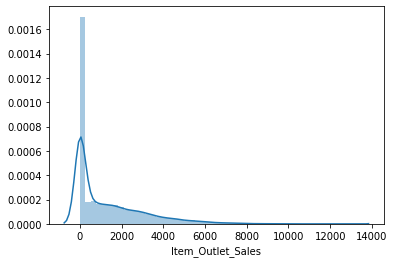

In [86]:
sns.distplot(df['Item_Outlet_Sales'])

In [87]:
print(df['Item_Outlet_Sales'].skew())
print(df['Item_Outlet_Sales'].kurt())

1.5446838706795232
2.4194394261737604


We see that the Item_outlet_sales is skewed

## UNIVARIATE EDA

In [88]:
cat_features=df.select_dtypes([np.object])

In [89]:
num_features=df.select_dtypes([np.number])

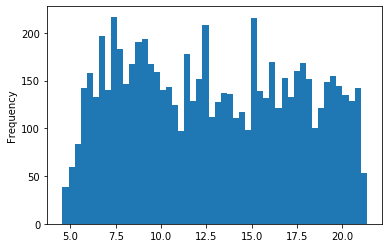

In [90]:
train['Item_Weight'].plot.hist(bins=50)

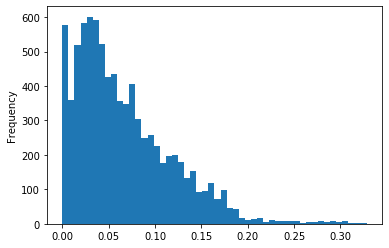

In [91]:
train['Item_Visibility'].plot.hist(bins=50)

it is skewed toward the left plus many tems visibility is 0 values

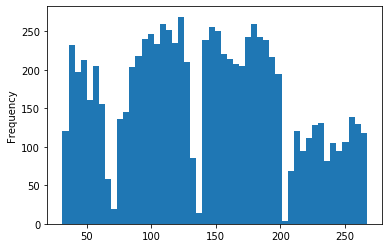

In [92]:
train['Item_MRP'].plot.hist(bins=50)

Here the data is distributed in odd manner

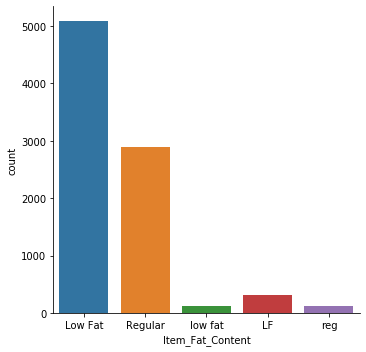

In [93]:
sns.catplot(x='Item_Fat_Content',data=train,kind='count')

Here the values in graphs are distributed in where the values in x axis have some common values with different text

In [94]:
def change1(x):
    if x=='reg':
        return 'Regular'
    elif x=='LF' or x=='low fat':
        return 'Low Fat'
    else:
        return x

In [95]:
train['Item_Fat_Content']=train['Item_Fat_Content'].apply(lambda x: change1(x))

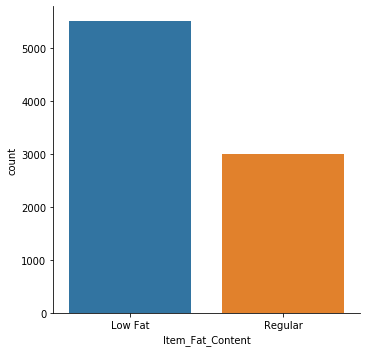

In [96]:
sns.catplot(x='Item_Fat_Content',data=train,kind='count')

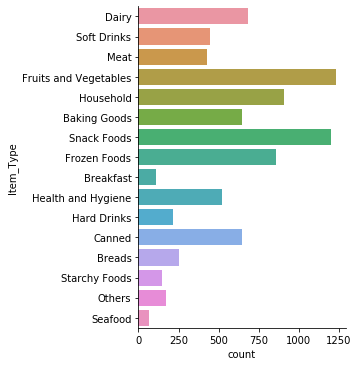

In [97]:
sns.catplot(y='Item_Type',data=train,kind='count')

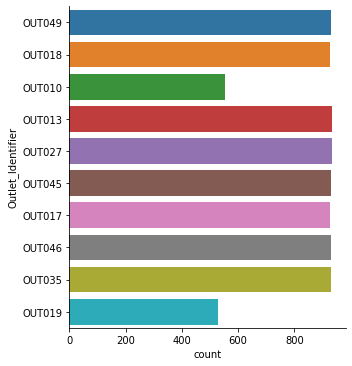

In [98]:
sns.catplot(y='Outlet_Identifier',kind = 'count',data = train)

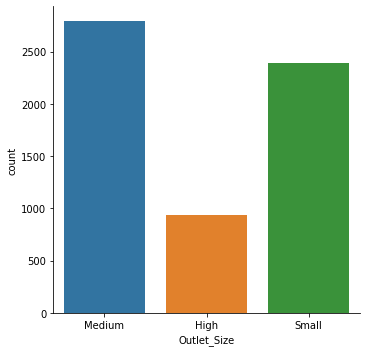

In [99]:
sns.catplot(x='Outlet_Size',kind = 'count',data = train)

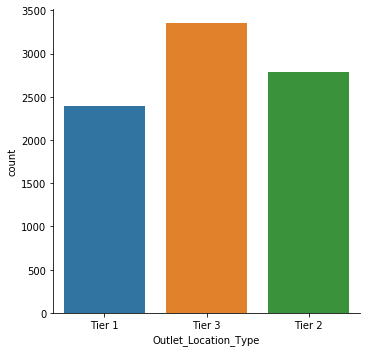

In [100]:
sns.catplot(x='Outlet_Location_Type',kind = 'count',data = train)

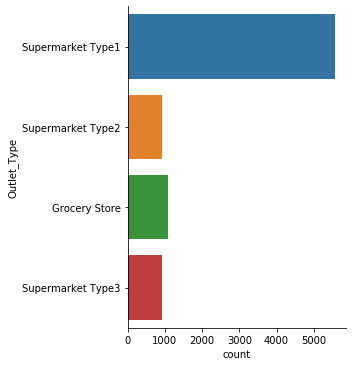

In [101]:
sns.catplot(y='Outlet_Type',kind = 'count',data = train)

C:\Users\prady\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\prady\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


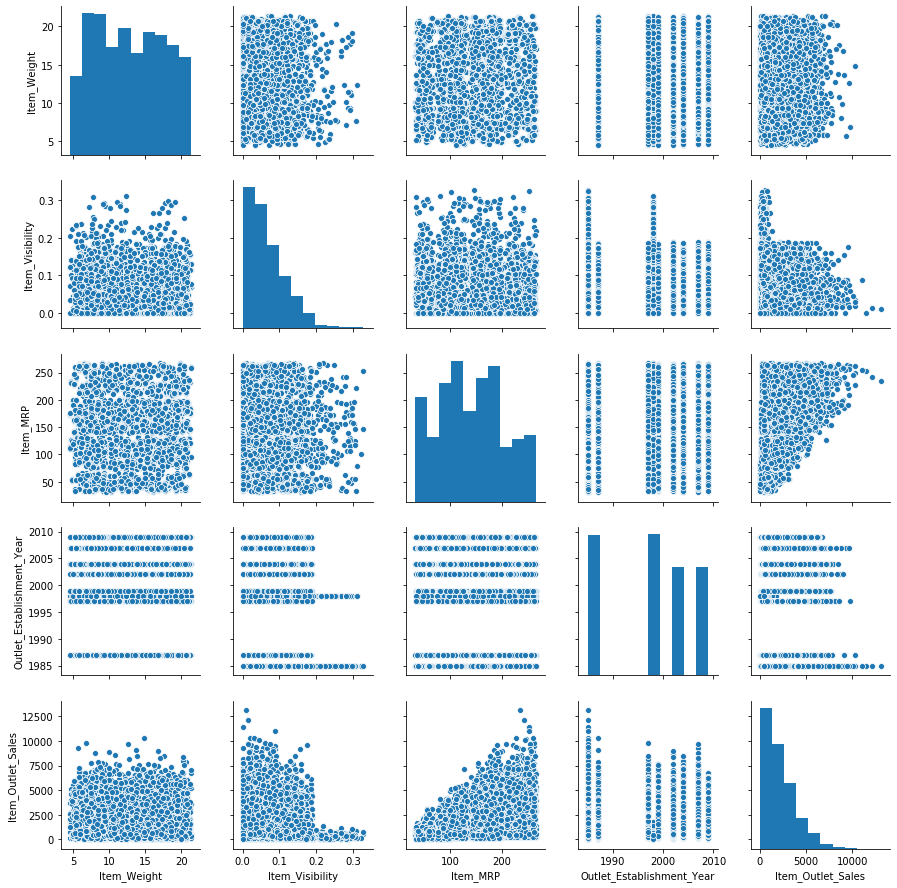

In [102]:
g=sns.pairplot(train)

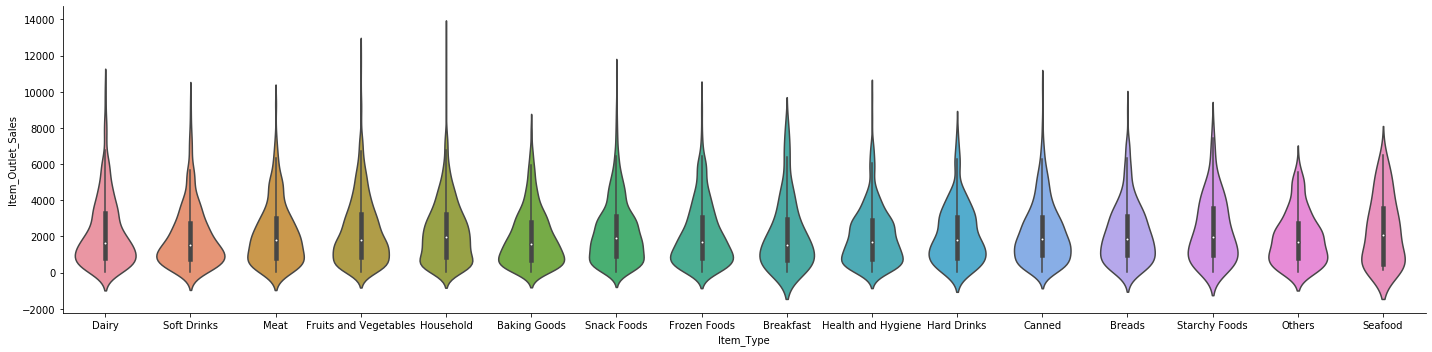

In [103]:

sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = train,aspect=4)

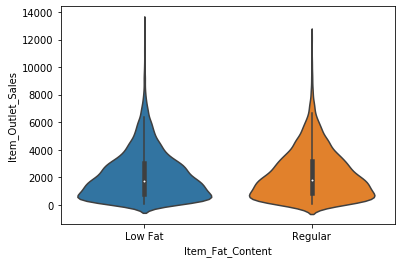

In [104]:
sns.violinplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train)

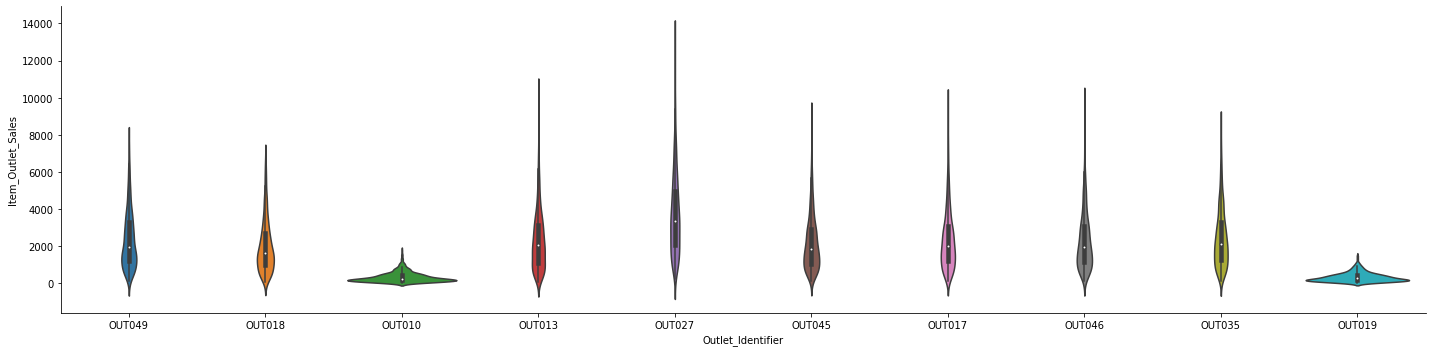

In [105]:
sns.catplot('Outlet_Identifier','Item_Outlet_Sales',kind = 'violin',data = train,aspect = 4)

here oulet 10 and outlet 19 are disbrutes in different way as compared to others

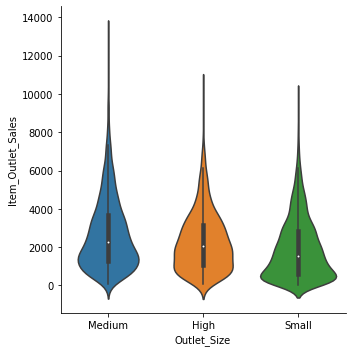

In [106]:
sns.catplot('Outlet_Size','Item_Outlet_Sales',kind='violin',data = train)

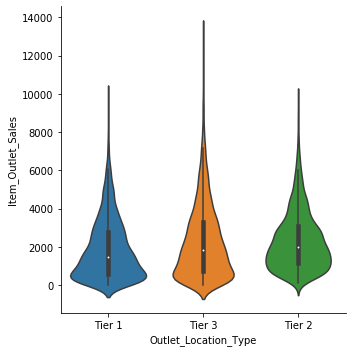

In [107]:
sns.catplot('Outlet_Location_Type','Item_Outlet_Sales',kind='violin',data = train)

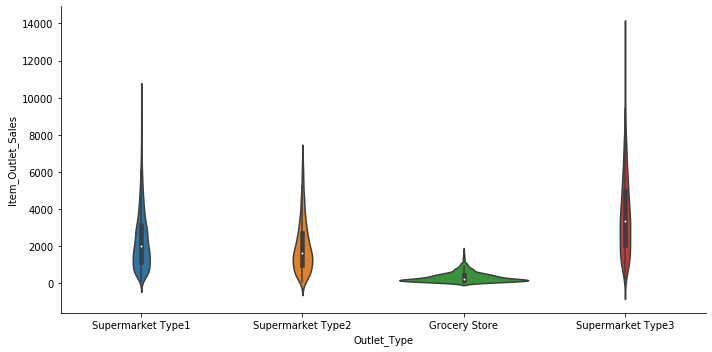

In [108]:
sns.catplot('Outlet_Type','Item_Outlet_Sales',kind='violin',data = train,aspect=2)

Handling the missing Values

In [109]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace = True)


In [110]:
train['Outlet_Size'].fillna('Small',inplace  = True)

Handling the Item Visibility Since some values were assignes 0 which is not possible

In [111]:
a= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()
a

0.07048184085069421

In [112]:
train['Item_Visibility']=train['Item_Visibility'].replace(0.0,a)

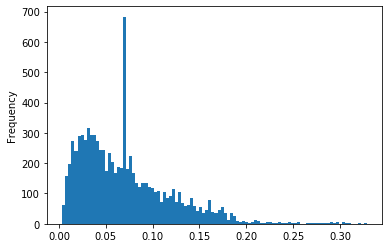

In [113]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

Feature Engineering

Creating Features based on item is perishabale or not

In [114]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

In [115]:
def change2(x):
    if x in perishable:
        return 'perishable'
    elif x in non_perishable:
        return 'non_perishable'
    else:
        return 'unknown'

In [116]:
train['Item_Type_new']=train['Item_Type'].apply(lambda x:change2(x))

In [117]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_new
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,non_perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,perishable
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,non_perishable


In [118]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Extracting some categories from Item_Identfier

In [119]:
train['Item_cat']=train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)

In [120]:
food=pd.crosstab(train['Item_Type'],train['Item_cat'])

In [121]:
food

Item_cat,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


Those which are Not COnsumable are made to be Non - Edilble in fat section

In [122]:
train['Item_Fat_Content'][(train['Item_cat']=='NC')]='Non Edible'


C:\Users\prady\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Getting the totals years 

In [123]:
train['years']=2020-train['Outlet_Establishment_Year']

In [124]:
train['Price_Per_Unit_Weight'] = train['Item_MRP']/train['Item_Weight']

In histogram MRP was distributed in 4 chinks so we divided it into 4 categorie

In [125]:
def chang3(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(chang3)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_new,Item_cat,years,Price_Per_Unit_Weight,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable,FD,21,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,non_perishable,DR,11,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable,FD,21,8.092457,3rd
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,perishable,FD,22,9.484115,3rd
4,NCD19,8.93,Non Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,non_perishable,NC,33,6.031512,1st


Feature Preparation

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
le = LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = le.fit_transform(train['Item_MRP_Clusters'])

In [128]:
a = pd.get_dummies(train,columns=['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_cat'])
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_cat','source'],axis = 1 )
train = pd.concat([train,a],axis = 1)


In [129]:
l=train.columns

This is done in order to remove skewness ffrom the dataset

In [130]:
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

Building MOdels

In [133]:
from sklearn.linear_model import LinearRegression
del train['source']


In [134]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

,Item_Outlet_Sales,Item_Outlet_Sales
2317,3615.2940,3615.2940
6130,3115.9440,3115.9440
1331,2536.6980,2536.6980
781,1431.4700,1431.4700
4181,1976.0944,1976.0944


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 8)

In [144]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)


(6392, 1615) (2131, 1615) (6392, 2) (2131, 2)


In [145]:
model = LinearRegression(normalize=True,fit_intercept= True)

In [146]:
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [147]:
y_pred = model.predict(X_valid)

In [148]:
model.score(X_train,y_train),model.score(X_valid,y_valid)

C:\Users\prady\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\prady\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' u

(0.6243616671992926, 0.6375695045794086)

In [149]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [150]:
mean_squared_error(y_valid, y_pred),mean_absolute_error(y_valid, y_pred)


(1161904.4243619842, 813.8950762083524)